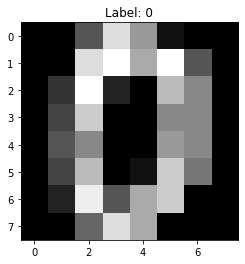

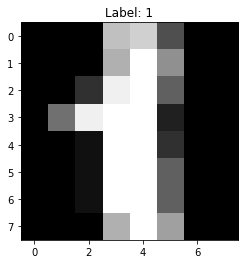

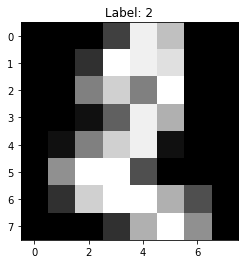

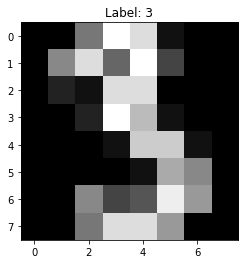

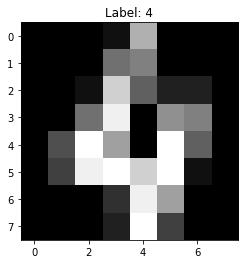

[1] Loss: 1.5915703177452087
[2] Loss: 0.6211171194911003
[3] Loss: 0.4204297438263893
[4] Loss: 0.3213957779109478
[5] Loss: 0.26706902757287027
[6] Loss: 0.23289375007152557
[7] Loss: 0.20831482410430907
[8] Loss: 0.18813345357775688
[9] Loss: 0.172143529728055
[10] Loss: 0.1593436785042286
[11] Loss: 0.14415905997157097
[12] Loss: 0.1388155546039343
[13] Loss: 0.12937890514731407
[14] Loss: 0.12389107942581176
[15] Loss: 0.11562215462327004
[16] Loss: 0.11048613339662552
[17] Loss: 0.10424517188221216
[18] Loss: 0.10121560003608465
[19] Loss: 0.09690531995147467
[20] Loss: 0.09252563882619143
[21] Loss: 0.09076363351196051
[22] Loss: 0.08482068050652743
[23] Loss: 0.08077390175312757
[24] Loss: 0.0803065225481987
[25] Loss: 0.07943080551922321
[26] Loss: 0.0756829084828496
[27] Loss: 0.07354007717221975
[28] Loss: 0.07025778451934457
[29] Loss: 0.06616480061784387
[30] Loss: 0.0666648892685771
[31] Loss: 0.06479434296488762
[32] Loss: 0.06273842044174671
[33] Loss: 0.058836604282259

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset and perform exploratory data analysis
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

# Plot some examples of the images
for i in range(5):
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.show()

# Prepare the data for training
X = digits.images.reshape(-1, 64)
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Train the model
model = MLP()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"[{epoch + 1}] Loss: {running_loss / (i + 1)}")

# Evaluate the model on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model

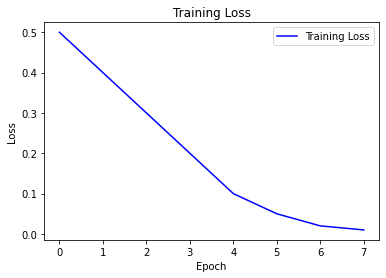

In [7]:
import matplotlib.pyplot as plt

epochs = range(len(loss))

plt.plot(epochs, 'b', label='Training Loss')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()

plt.show()
